In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Application Record

In [ ]:
df_app=pd.read_csv("/content/application_record (1).csv")
print(df_app.shape)

(438557, 18)


In [ ]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
df_app.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [ ]:
df_app["ID"]=df_app["ID"].astype("object")

In [ ]:
df_app["DAYS_BIRTH"]=df_app["DAYS_BIRTH"].abs()//365
df_app["DAYS_EMPLOYED"]=df_app["DAYS_EMPLOYED"].abs()//365
df_app["DAYS_BIRTH"]=df_app["DAYS_BIRTH"].astype("int")
df_app["DAYS_EMPLOYED"]=df_app["DAYS_EMPLOYED"].astype("int")

df_app["AMT_INCOME_TOTAL"]=df_app["AMT_INCOME_TOTAL"].astype("int")
df_app["CNT_FAM_MEMBERS"]=df_app["CNT_FAM_MEMBERS"].astype("int")

In [ ]:
df_app.rename(columns={"DAYS_BIRTH":"AGE","DAYS_EMPLOYED":"YEARS_EMPLOYED"},inplace=True)

In [ ]:
df_app.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,0.427390,1.875243e+05,43.326489,177.301667,1.0,0.206133,0.287771,0.108207,2.194465
std,0.724882,1.100869e+05,11.467500,374.703722,0.0,0.404527,0.452724,0.310642,0.897207
min,0.000000,2.610000e+04,20.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.215000e+05,34.000000,2.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,0.000000,1.607800e+05,42.000000,6.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,1.000000,2.250000e+05,53.000000,16.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,19.000000,6.750000e+06,69.000000,1000.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [ ]:
df_app.describe(include="O")

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
count,438557,438557,438557,438557,438557,438557,438557,438557,304354
unique,438510,2,2,2,5,5,5,6,18
top,7137299,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,2,294440,275459,304074,226104,301821,299828,393831,78240


In [ ]:
df_app[df_app["ID"]==7137299]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
423160,7137299,M,Y,N,1,225000,Working,Secondary / secondary special,Married,House / apartment,41,19,1,1,1,0,High skill tech staff,3
426665,7137299,F,N,Y,0,292500,Working,Secondary / secondary special,Single / not married,Office apartment,53,5,1,0,0,0,Cleaning staff,1


In [ ]:
df_app.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,32,12,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,32,12,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500,Working,Secondary / secondary special,Married,House / apartment,58,3,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,1,1,Sales staff,1
5,5008810,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,1,1,Sales staff,1
6,5008811,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,1,1,Sales staff,1
7,5008812,F,N,Y,0,283500,Pensioner,Higher education,Separated,House / apartment,61,1000,1,0,0,0,NaN,1
8,5008813,F,N,Y,0,283500,Pensioner,Higher education,Separated,House / apartment,61,1000,1,0,0,0,NaN,1
9,5008814,F,N,Y,0,283500,Pensioner,Higher education,Separated,House / apartment,61,1000,1,0,0,0,NaN,1


In [ ]:
pd.crosstab(index=df_app["FLAG_OWN_CAR"],columns=df_app["FLAG_OWN_REALTY"])

FLAG_OWN_REALTY,N,Y
FLAG_OWN_CAR,,
N,84341,191118
Y,50142,112956


<ipython-input-14-a316a66851ba>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(),rotation=15)
<ipython-input-14-a316a66851ba>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(),rotation=20)


[Text(0, 0, 'Rented apartment'),
 Text(1, 0, 'House / apartment'),
 Text(2, 0, 'Municipal apartment'),
 Text(3, 0, 'With parents'),
 Text(4, 0, 'Co-op apartment'),
 Text(5, 0, 'Office apartment')]

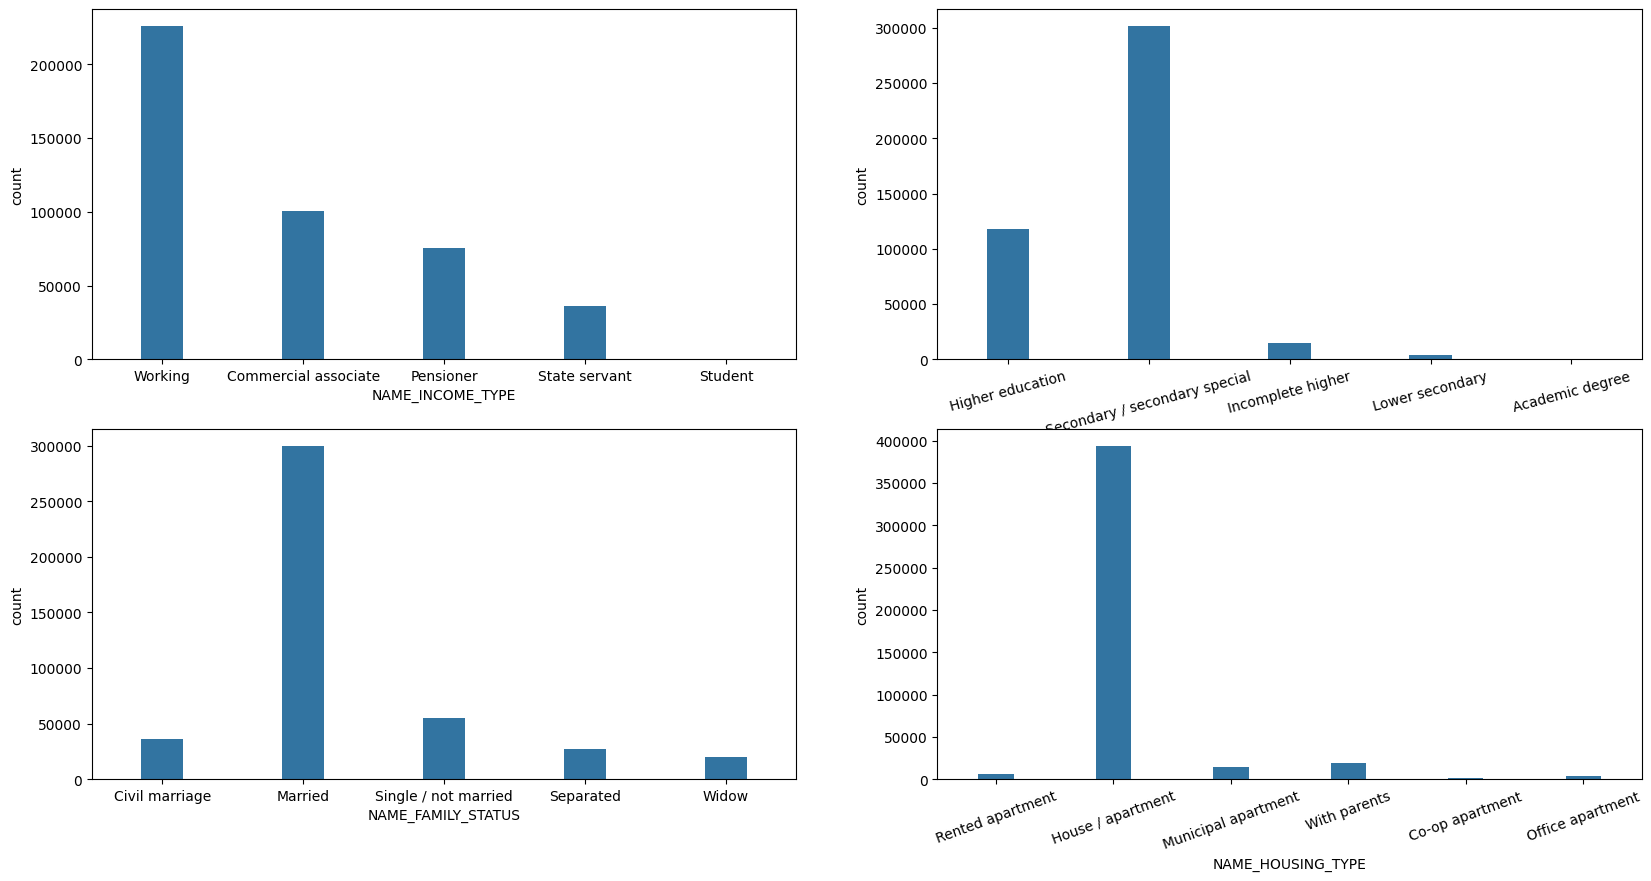

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(20,10))

sb.countplot(x=df_app["NAME_INCOME_TYPE"],ax=ax[0,0],width=0.3)
sb.countplot(x=df_app["NAME_EDUCATION_TYPE"],ax=ax[0,1],width=0.3)
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(),rotation=15)
sb.countplot(x=df_app["NAME_FAMILY_STATUS"],ax=ax[1,0],width=0.3)
sb.countplot(x=df_app["NAME_HOUSING_TYPE"],ax=ax[1,1],width=0.3)
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(),rotation=20)


In [ ]:
df_app.value_counts("OCCUPATION_TYPE")

OCCUPATION_TYPE
Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: count, dtype: int64

<Axes: xlabel='FLAG_EMAIL', ylabel='count'>

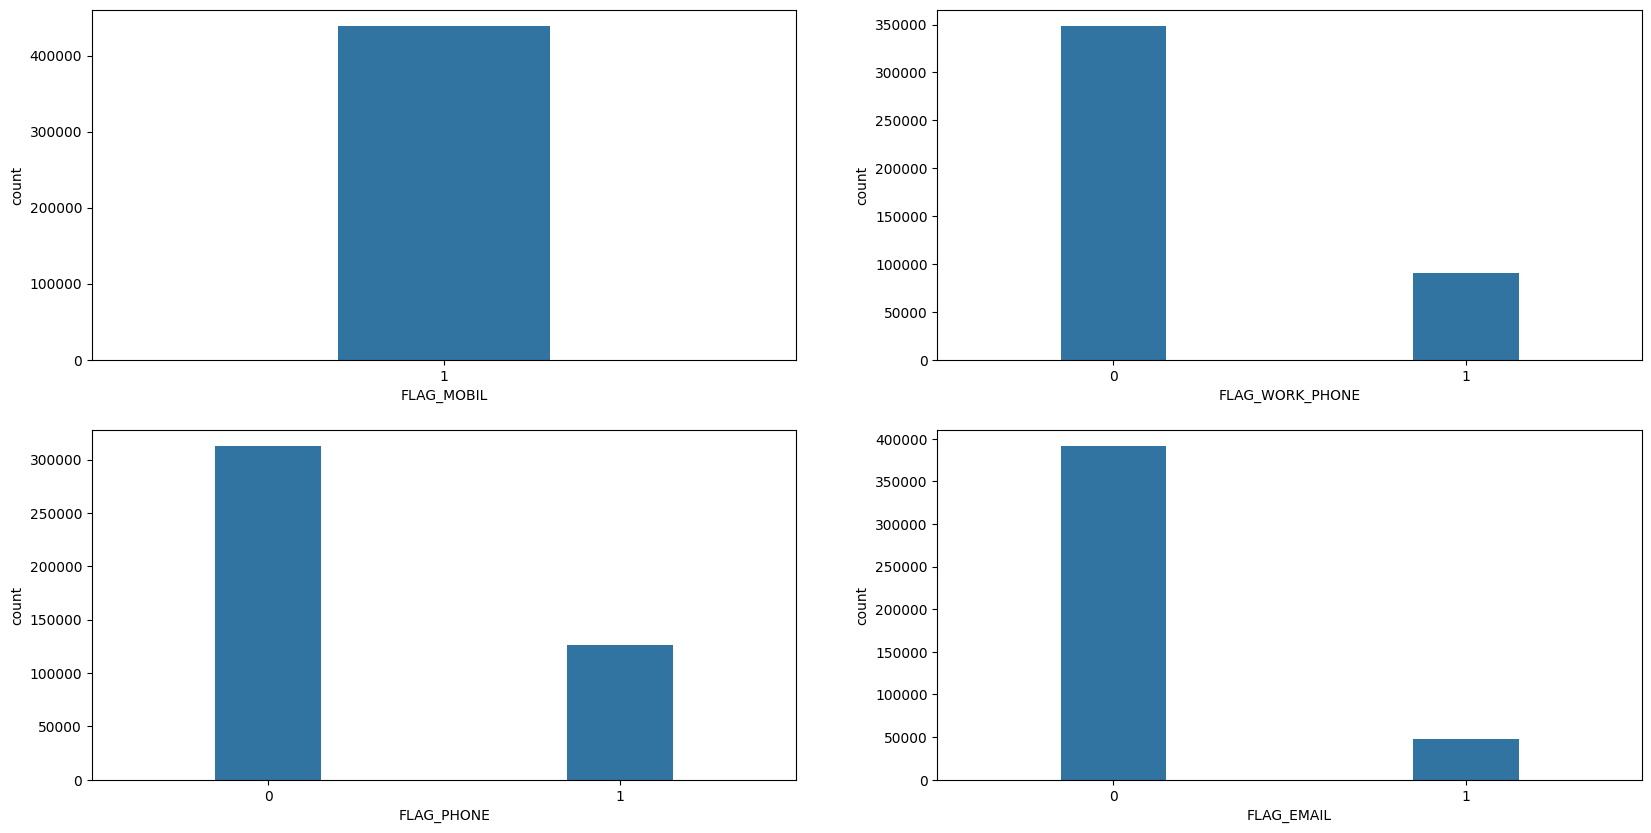

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(20,10))

sb.countplot(x=df_app["FLAG_MOBIL"],ax=ax[0,0],width=0.3)
sb.countplot(x=df_app["FLAG_WORK_PHONE"],ax=ax[0,1],width=0.3)
sb.countplot(x=df_app["FLAG_PHONE"],ax=ax[1,0],width=0.3)
sb.countplot(x=df_app["FLAG_EMAIL"],ax=ax[1,1],width=0.3)

# Credit Record

In [ ]:
df_cre=pd.read_csv("/content/credit_record.csv")
print(df_cre.shape)

(1048575, 3)


In [ ]:
df_cre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
df_cre["ID"]=df_cre["ID"].astype("object")

In [ ]:
df_cre.describe(include="O")

,ID,STATUS
count,1048575,1048575
unique,45985,8
top,5016769,C
freq,61,442031


In [ ]:
""" STATUS
0: 1-29 days past due
1: 30-59 days past due
2: 60-89 days overdue
3: 90-119 days overdue
4: 120-149 days overdue
5: Overdue or bad debts, write-offs for more than 150 days
C: paid off that month
X: No loan for the month
"""

df_cre["STATUS"]=df_cre["STATUS"].map({'C':0,"X":0,"0":1,"1":2,"2":3,"3":4,"4":5,"5":6})

In [ ]:
df_cre.loc[df_cre["ID"]==5001711]

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001711,-1,1
2,5001711,-2,1
3,5001711,-3,1


In [ ]:
# Number of common ID's in both tables

len(set(df_cre["ID"]).intersection(set(df_app["ID"])))

36457

In [ ]:
df_cre.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001711,-1,1
2,5001711,-2,1
3,5001711,-3,1
4,5001712,0,0
5,5001712,-1,0
6,5001712,-2,0
7,5001712,-3,0
8,5001712,-4,0
9,5001712,-5,0


<Axes: xlabel='MONTHS_BALANCE', ylabel='Density'>

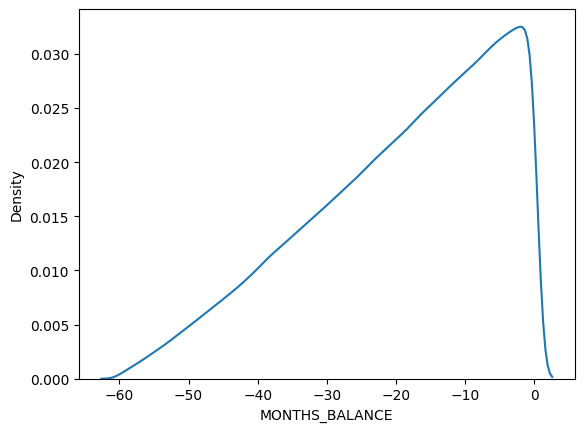

In [ ]:
sb.kdeplot(x=df_cre["MONTHS_BALANCE"])

<Axes: xlabel='MONTHS_BALANCE', ylabel='STATUS'>

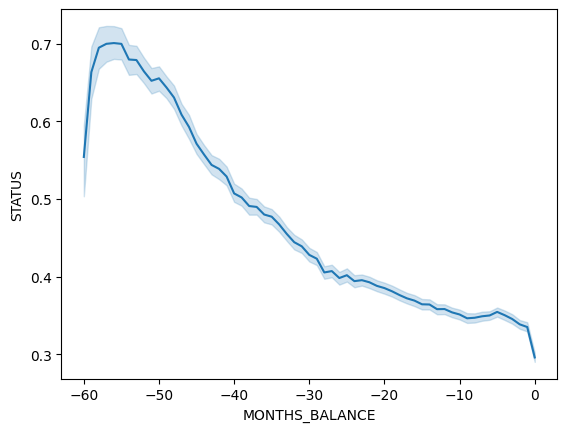

In [ ]:
sb.lineplot(x=df_cre["MONTHS_BALANCE"],y=df_cre["STATUS"])

In [ ]:
grp_months=df_cre.groupby("ID")["MONTHS_BALANCE"].min().to_frame()

In [ ]:
grp_status=df_cre.groupby("ID")["STATUS"].sum().to_frame()

In [ ]:
grouped=grp_months.merge(grp_status,on="ID")
grouped

,MONTHS_BALANCE,STATUS
ID,,
5001711,-3,3
5001712,-18,10
5001713,-21,0
5001714,-14,0
5001715,-59,0
...,...,...
5150482,-28,12
5150483,-17,0
5150484,-12,12


<Axes: xlabel='MONTHS_BALANCE', ylabel='STATUS'>

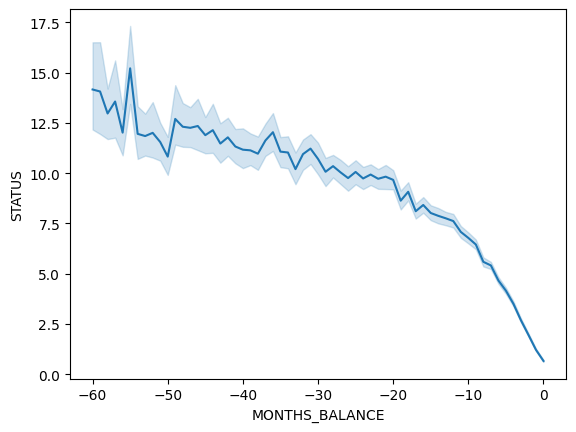

In [ ]:
sb.lineplot(x=grouped["MONTHS_BALANCE"],y=grouped["STATUS"])

In [ ]:
df=df_app.merge(grouped,on="ID",how="inner")
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,32,12,1,1,0,0,NaN,2,-15,3
1,5008805,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,32,12,1,1,0,0,NaN,2,-14,3
2,5008806,M,Y,Y,0,112500,Working,Secondary / secondary special,Married,House / apartment,58,3,1,0,0,0,Security staff,2,-29,7
3,5008808,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,1,1,Sales staff,1,-4,2
4,5008809,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,1,1,Sales staff,1,-26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000,Working,Secondary / secondary special,Married,House / apartment,47,6,1,0,0,0,Managers,2,-11,23
36453,5149834,F,N,Y,0,157500,Commercial associate,Higher education,Married,House / apartment,33,3,1,0,1,1,Medicine staff,2,-23,72
36454,5149838,F,N,Y,0,157500,Pensioner,Higher education,Married,House / apartment,33,3,1,0,1,1,Medicine staff,2,-32,72
36455,5150049,F,N,Y,0,283500,Working,Secondary / secondary special,Married,House / apartment,49,1,1,0,0,0,Sales staff,2,-9,13


In [ ]:
df["OCCUPATION_TYPE"].fillna("Missing",inplace=True)

In [ ]:
df["CODE_GENDER"]=df["CODE_GENDER"].map({"F":0,"M":1})
df["FLAG_OWN_CAR"]=df["FLAG_OWN_CAR"].map({"N":0,"Y":1})
df["FLAG_OWN_REALTY"]=df["FLAG_OWN_REALTY"].map({"N":0,"Y":1})
df["NAME_INCOME_TYPE"]=df["NAME_INCOME_TYPE"].map({"Commercial associate":3,"Pensioner":0,"State servant":1,"Working":2})
df["NAME_EDUCATION_TYPE"]=df["NAME_EDUCATION_TYPE"].map({"Higher education":3,"Secondary / secondary special":2,"Incomplete higher":1,"Lower secondary":0})
df["NAME_FAMILY_STATUS"]=df["NAME_FAMILY_STATUS"].map({"Married":2,"Single / not married":0,"Civil marriage":1,"Separated":3,"Widow or widower":4})
df["NAME_HOUSING_TYPE"]=df["NAME_HOUSING_TYPE"].map({"House / apartment":3,"With parents":2,"Municipal apartment":1,"Rented apartment":0,"Office apartment":4})
df["OCCUPATION_TYPE"]=df["OCCUPATION_TYPE"].map({"Missing":0,"Laborers":1,"Core staff":2,"Drivers":1,"Managers":3,  "High skill tech staff":4 , "Accountants":2,
                                                 "Medicine staff":2 , "Cooking staff":1 , "Security staff":1,"Waiters/barmen staff":1 , "Secretaries":2,
                                                 "Low-skill Laborers":1, "Cleaning staff":1 , "Realty agents":6 , "HR staff":3 , "Private service staff":3,"Sales staff":2})

In [ ]:
conti_fetures=["AMT_INCOME_TOTAL","AGE","YEARS_EMPLOYED","MONTHS_BALANCE","STATUS"]
df_temp=df[conti_fetures]

<Axes: >

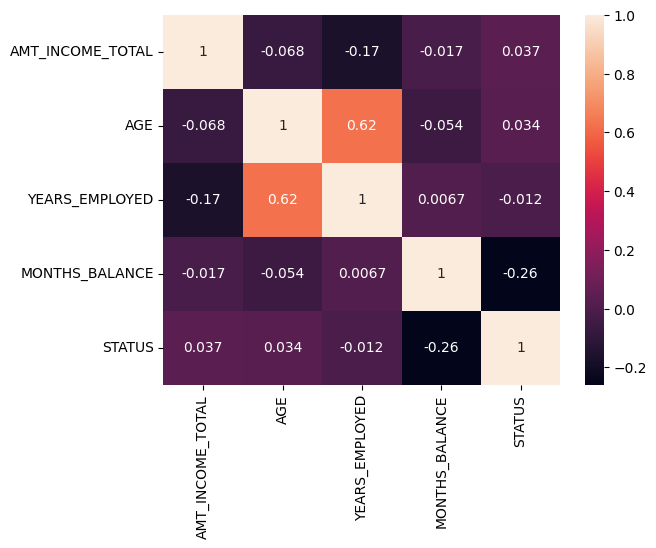

In [ ]:
sb.heatmap(df_temp.corr(),annot=True)

In [ ]:
df.drop(["FLAG_MOBIL"],axis=1,inplace=True)
df["NAME_INCOME_TYPE"].fillna(df["NAME_INCOME_TYPE"].mode()[0],inplace=True)
df["NAME_EDUCATION_TYPE"].fillna(df["NAME_EDUCATION_TYPE"].mode()[0],inplace=True)
df["OCCUPATION_TYPE"].fillna(df["OCCUPATION_TYPE"].mode()[0],inplace=True)
df["NAME_FAMILY_STATUS"].fillna(df["NAME_FAMILY_STATUS"].mode()[0],inplace=True)
df["NAME_HOUSING_TYPE"].fillna(df["NAME_HOUSING_TYPE"].mode()[0],inplace=True)


In [ ]:
y=df.columns
df_temp=df[y]


pca=PCA(n_components=3)
pca_index=df_temp["ID"]
df_pca=pca.fit_transform(df_temp.drop("ID",axis=1))
df_pca=pd.DataFrame(df_pca,columns=["col1","col2","col3"])
df_pca.index=pca_index
df_pca

,col1,col2,col3
ID,,,
5008804,240814.317980,-14.324817,-13.628942
5008805,240814.317977,-14.324645,-14.597963
5008806,-74185.617342,-216.091238,3.595352
5008808,83314.349899,-114.571054,-22.778833
5008809,83314.349954,-114.574490,-1.940598
...,...,...,...
5149828,128314.342793,-89.062819,-11.402587
5149834,-29185.625396,-188.982974,11.778084
5149838,-29185.625376,-188.977992,20.500201


In [ ]:
km=KMeans(n_clusters=2,init='k-means++', n_init=10, max_iter=100, random_state=0)
km.fit(df_pca)
label=km.labels_
df_temp["cluster_label"]=label


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,cluster_label
0,5008804,1,1,1,0,427500,2.0,3.0,1.0,0.0,32,12,1,0,0,0.0,2,-15,3,1
1,5008805,1,1,1,0,427500,2.0,3.0,1.0,0.0,32,12,1,0,0,0.0,2,-14,3,1
2,5008806,1,1,1,0,112500,2.0,2.0,2.0,3.0,58,3,0,0,0,1.0,2,-29,7,0
3,5008808,0,0,1,0,270000,3.0,2.0,0.0,3.0,52,8,0,1,1,2.0,1,-4,2,1
4,5008809,0,0,1,0,270000,3.0,2.0,0.0,3.0,52,8,0,1,1,2.0,1,-26,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,0,315000,2.0,2.0,2.0,3.0,47,6,0,0,0,3.0,2,-11,23,1
36453,5149834,0,0,1,0,157500,3.0,3.0,2.0,3.0,33,3,0,1,1,2.0,2,-23,72,0
36454,5149838,0,0,1,0,157500,0.0,3.0,2.0,3.0,33,3,0,1,1,2.0,2,-32,72,0
36455,5150049,0,0,1,0,283500,2.0,2.0,2.0,3.0,49,1,0,0,0,2.0,2,-9,13,1


In [ ]:
df_temp.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,cluster_label
0,5008804,1,1,1,0,427500,2.0,3.0,1.0,0.0,32,12,1,0,0,0.0,2,-15,3,1
1,5008805,1,1,1,0,427500,2.0,3.0,1.0,0.0,32,12,1,0,0,0.0,2,-14,3,1
2,5008806,1,1,1,0,112500,2.0,2.0,2.0,3.0,58,3,0,0,0,1.0,2,-29,7,0
3,5008808,0,0,1,0,270000,3.0,2.0,0.0,3.0,52,8,0,1,1,2.0,1,-4,2,1
4,5008809,0,0,1,0,270000,3.0,2.0,0.0,3.0,52,8,0,1,1,2.0,1,-26,0,1
5,5008810,0,0,1,0,270000,3.0,2.0,0.0,3.0,52,8,0,1,1,2.0,1,-26,6,1
6,5008811,0,0,1,0,270000,3.0,2.0,0.0,3.0,52,8,0,1,1,2.0,1,-38,6,1
7,5008812,0,0,1,0,283500,0.0,3.0,3.0,3.0,61,1000,0,0,0,0.0,1,-20,14,1
8,5008813,0,0,1,0,283500,0.0,3.0,3.0,3.0,61,1000,0,0,0,0.0,1,-16,14,1
9,5008814,0,0,1,0,283500,0.0,3.0,3.0,3.0,61,1000,0,0,0,0.0,1,-17,14,1


In [ ]:
score=silhouette_score(df_pca,label)
print("Silhouette score:",score)

Silhouette score: 0.6355810802432449
